In [ ]:
!pip install -U torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)


In [ ]:
# установка подходящей версии torch

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu101/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu101/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu101/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu101/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu101/torch-0.4.1-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu101/torch-0.4.1-cp36-cp36m-linux_x86_64.whl


In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:

!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)


Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
5.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
!unzip -q /content/gdrive/My\ Drive/journey-springfield.zip -d yyy

In [ ]:
!unzip -q /content/gdrive/My\ Drive/simpsons_dataset.zip -d train
!unzip -q /content/gdrive/My\ Drive/testset.zip -d test

replace train/abraham_grampa_simpson/pic_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace test/img0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!ls train

img0.jpg    img24.jpg	img39.jpg   img549.jpg	img699.jpg  img848.jpg
img100.jpg  img250.jpg	img3.jpg    img54.jpg	img69.jpg   img849.jpg
img101.jpg  img251.jpg	img400.jpg  img550.jpg	img6.jpg    img84.jpg
img102.jpg  img252.jpg	img401.jpg  img551.jpg	img700.jpg  img850.jpg
img103.jpg  img253.jpg	img402.jpg  img552.jpg	img701.jpg  img851.jpg
img104.jpg  img254.jpg	img403.jpg  img553.jpg	img702.jpg  img852.jpg
img105.jpg  img255.jpg	img404.jpg  img554.jpg	img703.jpg  img853.jpg
img106.jpg  img256.jpg	img405.jpg  img555.jpg	img704.jpg  img854.jpg
img107.jpg  img257.jpg	img406.jpg  img556.jpg	img705.jpg  img855.jpg
img108.jpg  img258.jpg	img407.jpg  img557.jpg	img706.jpg  img856.jpg
img109.jpg  img259.jpg	img408.jpg  img558.jpg	img707.jpg  img857.jpg
img10.jpg   img25.jpg	img409.jpg  img559.jpg	img708.jpg  img858.jpg
img110.jpg  img260.jpg	img40.jpg   img55.jpg	img709.jpg  img859.jpg
img111.jpg  img261.jpg	img410.jpg  img560.jpg	img70.jpg   img85.jpg
img112.jpg  img262.jpg	img411.jpg  img56

In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Fri May  8 16:48:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

True

In [ ]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [1]:
# different mode of dataset
DATA_MODES = ['train', 'val', 'test']
# all images will be scaled to 224x224 px
RESCALE_SIZE = 224
# use GPU
DEVICE = torch.device("cuda")

NameError: ignored

In [ ]:
"""
we redefine the getitem method for convenient work with this data structure. 
LabelEncoder is also used to convert string class labels to id and back. 
The dataset description says that the images are of different sizes because they 
were taken directly from the video, so we should bring them to one size (the _prepare_sample method does this).
"""
class SimpsonsDataset(Dataset):

    def __init__(self, files, mode):
        super().__init__()
        # file list for download
        self.files = sorted(files)
        # mode
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # to convert images into PyTorch tensors and normalize the input
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow for tensors"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
TRAIN_DIR = Path('train')
#TEST_DIR = Path('test')
TEST_DIR = Path('test')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val')

In [ ]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

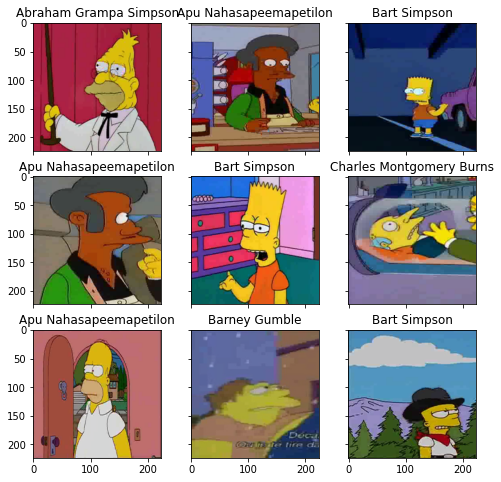

In [ ]:
# Show picture
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

In [ ]:

class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        """
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=3),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        """
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        #x = self.conv6(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters(), lr=0.0001)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:

def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2,

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
# Training NN
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=40, batch_size=64)

epoch:   0%|          | 0/40 [00:00<?, ?it/s]

loss 2.3393562514581943


epoch:   2%|▎         | 1/40 [02:49<1:50:20, 169.75s/it]


Epoch 001 train_loss: 2.3394     val_loss 1.7953 train_acc 0.3931 val_acc 0.5468
loss 1.472835897009755


epoch:   5%|▌         | 2/40 [05:38<1:47:22, 169.53s/it]


Epoch 002 train_loss: 1.4728     val_loss 1.3873 train_acc 0.6019 val_acc 0.6198
loss 1.127978963790118


epoch:   8%|▊         | 3/40 [08:28<1:44:35, 169.62s/it]


Epoch 003 train_loss: 1.1280     val_loss 1.1614 train_acc 0.6883 val_acc 0.6811
loss 0.8979892265691113


epoch:  10%|█         | 4/40 [11:18<1:41:52, 169.78s/it]


Epoch 004 train_loss: 0.8980     val_loss 1.0946 train_acc 0.7549 val_acc 0.7071
loss 0.7318013089957135


epoch:  12%|█▎        | 5/40 [14:08<1:39:06, 169.90s/it]


Epoch 005 train_loss: 0.7318     val_loss 0.9720 train_acc 0.7994 val_acc 0.7354
loss 0.6012062127726557


epoch:  15%|█▌        | 6/40 [16:59<1:36:25, 170.15s/it]


Epoch 006 train_loss: 0.6012     val_loss 0.9752 train_acc 0.8329 val_acc 0.7446
loss 0.4946490826557545


epoch:  18%|█▊        | 7/40 [19:50<1:33:41, 170.34s/it]


Epoch 007 train_loss: 0.4946     val_loss 0.8838 train_acc 0.8611 val_acc 0.7765
loss 0.40201067614687486


epoch:  20%|██        | 8/40 [22:41<1:30:57, 170.55s/it]


Epoch 008 train_loss: 0.4020     val_loss 0.8631 train_acc 0.8890 val_acc 0.7799
loss 0.30696688090816554


epoch:  22%|██▎       | 9/40 [25:31<1:27:59, 170.31s/it]


Epoch 009 train_loss: 0.3070     val_loss 0.8961 train_acc 0.9182 val_acc 0.7797
loss 0.24906210663975617


epoch:  25%|██▌       | 10/40 [28:20<1:25:02, 170.07s/it]


Epoch 010 train_loss: 0.2491     val_loss 0.9497 train_acc 0.9308 val_acc 0.7839
loss 0.1886977461259284


epoch:  28%|██▊       | 11/40 [31:11<1:22:16, 170.22s/it]


Epoch 011 train_loss: 0.1887     val_loss 0.9559 train_acc 0.9482 val_acc 0.7914
loss 0.14884259534915606


epoch:  30%|███       | 12/40 [34:01<1:19:29, 170.33s/it]


Epoch 012 train_loss: 0.1488     val_loss 0.9645 train_acc 0.9605 val_acc 0.7969
loss 0.10952591868507208


epoch:  32%|███▎      | 13/40 [36:53<1:16:45, 170.58s/it]


Epoch 013 train_loss: 0.1095     val_loss 1.0716 train_acc 0.9698 val_acc 0.7872
loss 0.08311784791799479


epoch:  35%|███▌      | 14/40 [39:43<1:13:57, 170.66s/it]


Epoch 014 train_loss: 0.0831     val_loss 1.0712 train_acc 0.9787 val_acc 0.7933
loss 0.06604902487286386


epoch:  38%|███▊      | 15/40 [42:34<1:11:02, 170.51s/it]


Epoch 015 train_loss: 0.0660     val_loss 1.1497 train_acc 0.9823 val_acc 0.7971
loss 0.05659853217620133


epoch:  40%|████      | 16/40 [45:23<1:08:05, 170.24s/it]


Epoch 016 train_loss: 0.0566     val_loss 1.1266 train_acc 0.9850 val_acc 0.8089
loss 0.055245388083288535


epoch:  42%|████▎     | 17/40 [48:13<1:05:10, 170.03s/it]


Epoch 017 train_loss: 0.0552     val_loss 1.1295 train_acc 0.9841 val_acc 0.8057
loss 0.053317015156256885


epoch:  45%|████▌     | 18/40 [51:02<1:02:13, 169.71s/it]


Epoch 018 train_loss: 0.0533     val_loss 1.1908 train_acc 0.9853 val_acc 0.7965
loss 0.05102830563558994


epoch:  48%|████▊     | 19/40 [53:49<59:10, 169.07s/it]


Epoch 019 train_loss: 0.0510     val_loss 1.2646 train_acc 0.9855 val_acc 0.7965
loss 0.02032520160275008


epoch:  50%|█████     | 20/40 [56:36<56:04, 168.23s/it]


Epoch 020 train_loss: 0.0203     val_loss 1.3091 train_acc 0.9966 val_acc 0.8059
loss 0.039562283699309427


epoch:  52%|█████▎    | 21/40 [59:22<53:08, 167.79s/it]


Epoch 021 train_loss: 0.0396     val_loss 1.2860 train_acc 0.9890 val_acc 0.7948
loss 0.050926402914056326


epoch:  55%|█████▌    | 22/40 [1:02:08<50:09, 167.18s/it]


Epoch 022 train_loss: 0.0509     val_loss 1.3280 train_acc 0.9845 val_acc 0.7958
loss 0.03237115319886955


epoch:  57%|█████▊    | 23/40 [1:04:54<47:15, 166.78s/it]


Epoch 023 train_loss: 0.0324     val_loss 1.4499 train_acc 0.9910 val_acc 0.7940
loss 0.038270592243355536


epoch:  60%|██████    | 24/40 [1:07:40<44:23, 166.48s/it]


Epoch 024 train_loss: 0.0383     val_loss 1.3733 train_acc 0.9884 val_acc 0.7837
loss 0.024610668898228664


epoch:  62%|██████▎   | 25/40 [1:10:27<41:39, 166.66s/it]


Epoch 025 train_loss: 0.0246     val_loss 1.3841 train_acc 0.9941 val_acc 0.8049
loss 0.03318748204437982


epoch:  65%|██████▌   | 26/40 [1:13:13<38:52, 166.63s/it]


Epoch 026 train_loss: 0.0332     val_loss 1.4531 train_acc 0.9894 val_acc 0.7952
loss 0.024193497065903683


epoch:  68%|██████▊   | 27/40 [1:15:59<36:01, 166.28s/it]


Epoch 027 train_loss: 0.0242     val_loss 1.5445 train_acc 0.9932 val_acc 0.8024
loss 0.022567912151291503


epoch:  70%|███████   | 28/40 [1:18:45<33:14, 166.20s/it]


Epoch 028 train_loss: 0.0226     val_loss 1.5589 train_acc 0.9934 val_acc 0.7916
loss 0.029866361338455383


epoch:  72%|███████▎  | 29/40 [1:21:31<30:28, 166.21s/it]


Epoch 029 train_loss: 0.0299     val_loss 1.4236 train_acc 0.9918 val_acc 0.7921
loss 0.021436356895535195


epoch:  75%|███████▌  | 30/40 [1:24:18<27:44, 166.45s/it]


Epoch 030 train_loss: 0.0214     val_loss 1.4609 train_acc 0.9939 val_acc 0.8126
loss 0.026579579713357067


epoch:  78%|███████▊  | 31/40 [1:27:05<25:00, 166.67s/it]


Epoch 031 train_loss: 0.0266     val_loss 1.6436 train_acc 0.9923 val_acc 0.7896
loss 0.02350442325552786


epoch:  80%|████████  | 32/40 [1:29:54<22:18, 167.30s/it]


Epoch 032 train_loss: 0.0235     val_loss 1.6299 train_acc 0.9932 val_acc 0.7986
loss 0.01863138566511569


epoch:  82%|████████▎ | 33/40 [1:32:43<19:35, 167.94s/it]


Epoch 033 train_loss: 0.0186     val_loss 1.5048 train_acc 0.9948 val_acc 0.8089
loss 0.03689672108003111


epoch:  85%|████████▌ | 34/40 [1:35:31<16:46, 167.74s/it]


Epoch 034 train_loss: 0.0369     val_loss 1.5495 train_acc 0.9889 val_acc 0.8003
loss 0.026468283502240033


epoch:  88%|████████▊ | 35/40 [1:38:16<13:55, 167.04s/it]


Epoch 035 train_loss: 0.0265     val_loss 1.4529 train_acc 0.9915 val_acc 0.8076
loss 0.010031699048446224


epoch:  90%|█████████ | 36/40 [1:41:02<11:07, 166.77s/it]


Epoch 036 train_loss: 0.0100     val_loss 1.6032 train_acc 0.9974 val_acc 0.8061
loss 0.014212533063918193


epoch:  92%|█████████▎| 37/40 [1:43:48<08:19, 166.56s/it]


Epoch 037 train_loss: 0.0142     val_loss 1.4922 train_acc 0.9962 val_acc 0.8166
loss 0.007999126204328709


epoch:  95%|█████████▌| 38/40 [1:46:35<05:32, 166.45s/it]


Epoch 038 train_loss: 0.0080     val_loss 1.5898 train_acc 0.9976 val_acc 0.8187
loss 0.03629198223350653


epoch:  98%|█████████▊| 39/40 [1:49:20<02:46, 166.19s/it]


Epoch 039 train_loss: 0.0363     val_loss 1.5886 train_acc 0.9887 val_acc 0.7937
loss 0.022438720801699227


epoch: 100%|██████████| 40/40 [1:52:04<00:00, 168.11s/it]


Epoch 040 train_loss: 0.0224     val_loss 1.5929 train_acc 0.9931 val_acc 0.8082


In [ ]:
# Build learning curves
loss, acc, val_loss, val_acc = zip(*history)

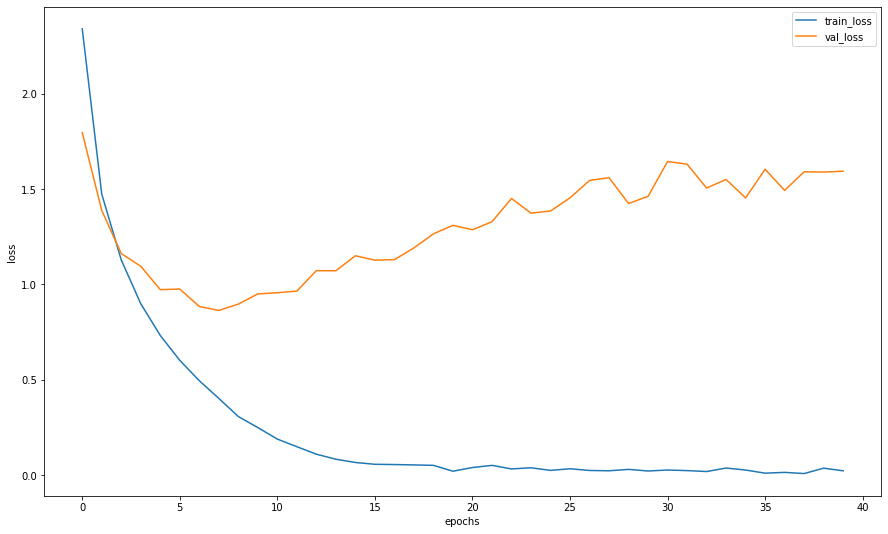

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Prediction, for one picture"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Let's calculate the target metric in the validation sample.

In [ ]:
from sklearn.metrics import f1_score

f1_score(actual_labels, preds_class)


ValueError: ignored

Let's do a cool visualization to see how confident the network is in its responses. You can use this to debug the correct output.

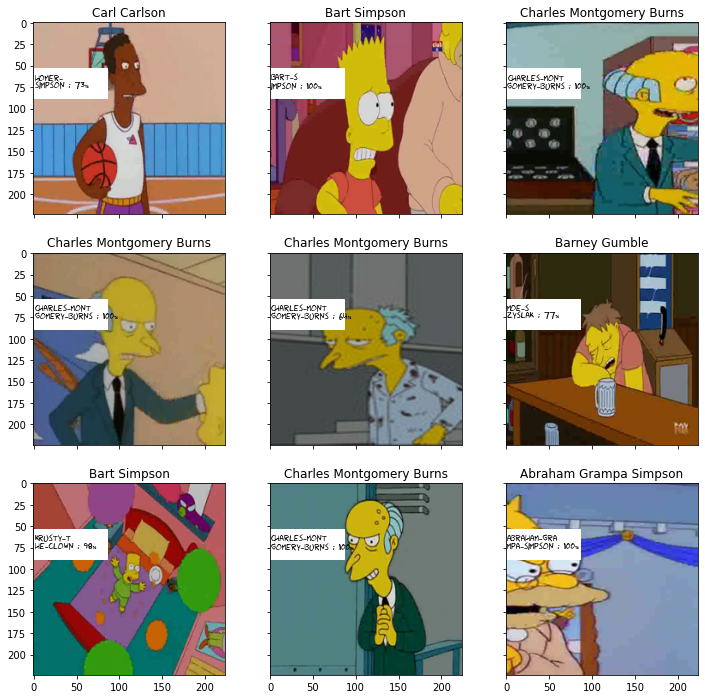

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')